In [1]:
import os
import sys
import math
import glob
import faiss
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(threshold=np.nan)

In [3]:
sys.path.append("../../../")
%run ../../../ai/dataset/everyone/model/item_index.py
%run ../../../ai/dataset/everyone/model/measures.py
%run ../../../ai/dataset/everyone/model/metrics.py

In [4]:
def load_npz(npz_path):
    npz = np.load(npz_path)
    # images = npz['images']
    images = None
    metas = npz['metas']
    return ItemIndex.from_npz(metas, images)

In [12]:
npz_path = "/home/chy/archive-data/processed/everyone-npz/"
blocks = glob.glob(os.path.join(npz_path, "item-*.npz"))
print("target npz blocks {}".format(len(blocks)))

item_indexes = []
for i, block_path in enumerate(blocks):
    indexes = load_npz(block_path)
    item_indexes += indexes

print("total item-indexes: {}".format(len(item_indexes)))

target npz blocks 2912
total item-indexes: 1490937


# prepare dataset full

In [15]:
X = []
for ii in item_indexes:
    cx = float(ii.camera_x)
    cy = float(ii.camera_y)
    X.append({
        "is_pad": "IPAD" in ii.device.upper()
        "camera x" : cx, 
        "camera y" : cy, 
        "camera dist" : math.sqrt(cx**2 + cy**2)
    })

# dist vis (cam x/y)

In [16]:
df = pd.DataFrame(X)

In [20]:
df.describe()

,is_pad
count,1490937
unique,2
top,False
freq,1272185


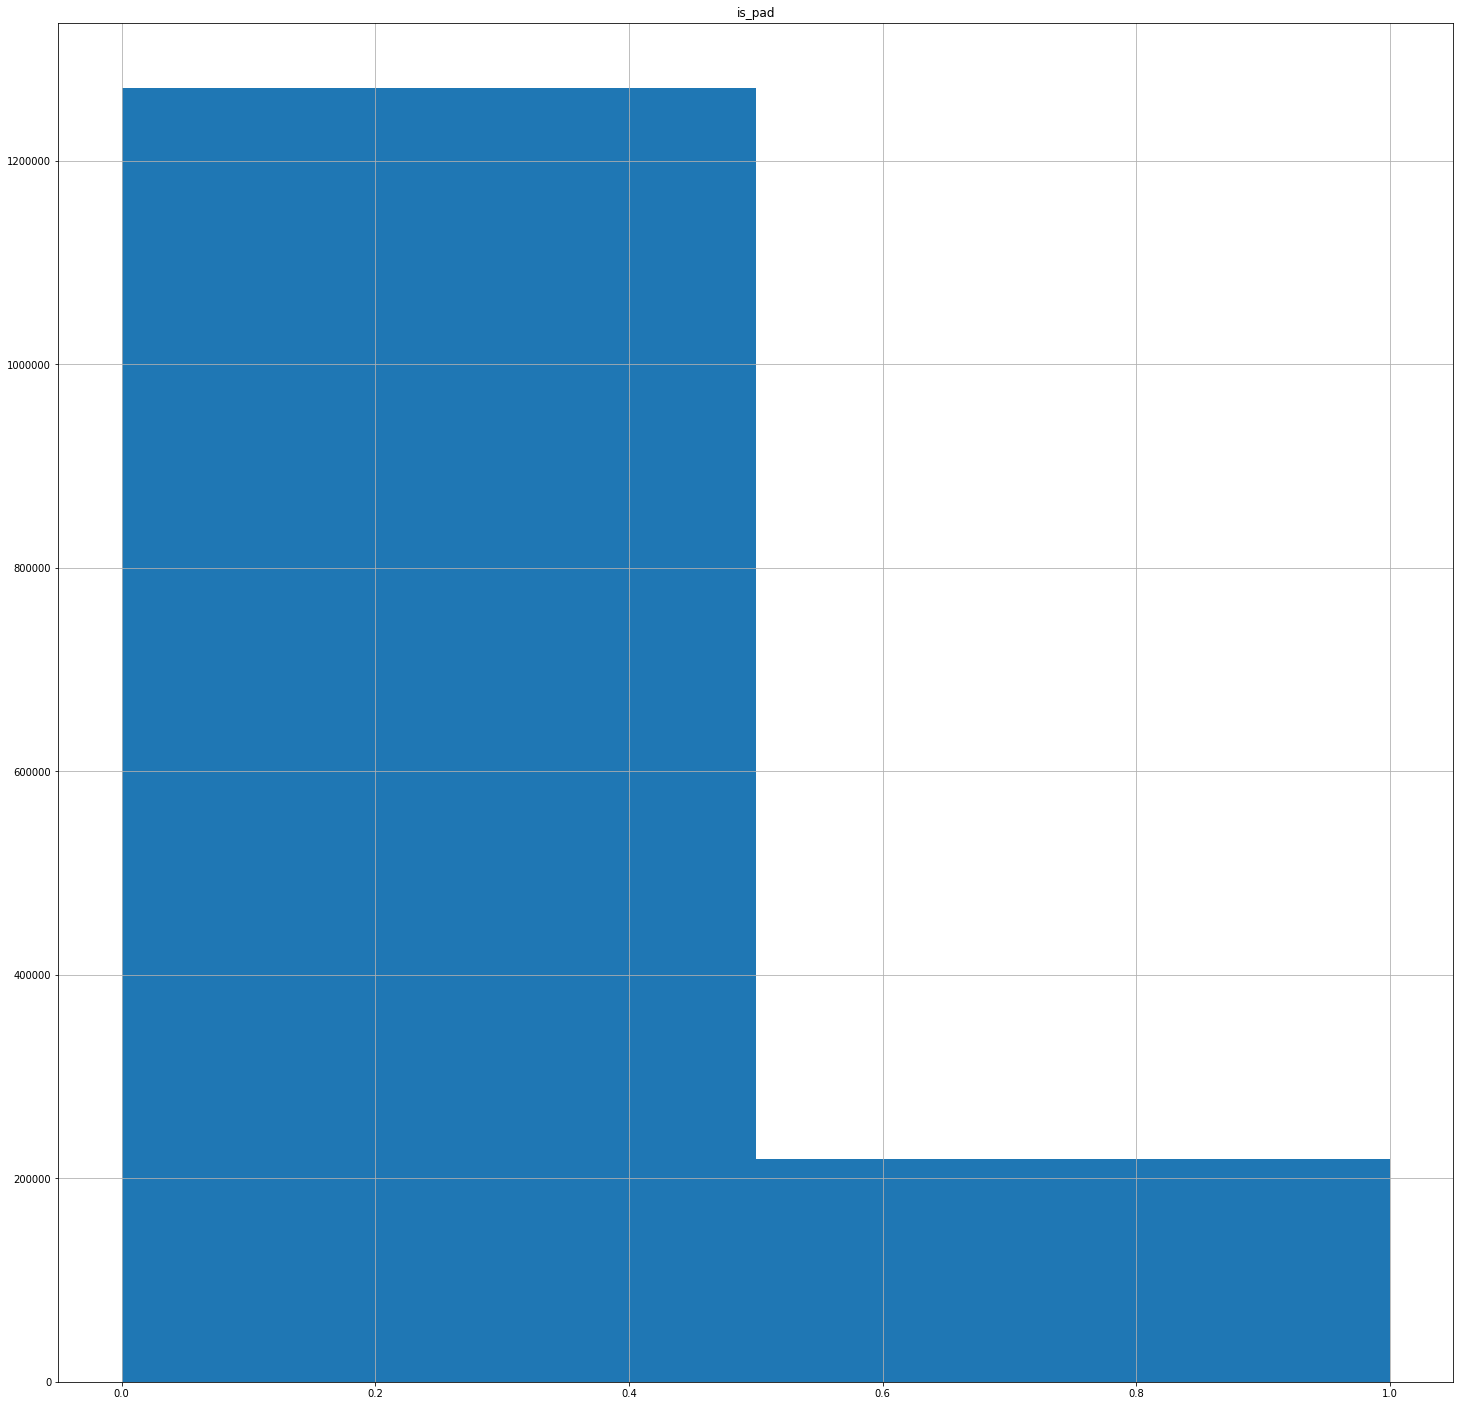

In [18]:
hist = df.hist(bins=128, figsize=(25,25))

# prepare dataset (orientation wise)

In [1]:
Xo = [[], [], [], []]
for ii in item_indexes:
    cx = float(ii.camera_x)
    cy = float(ii.camera_y)
    so = int(ii.orientation) -1 
    Xo[so].append({
        "camera x" : cx, 
        "camera y" : cy, 
        "camera dist" : math.sqrt(cx**2 + cy**2)})

NameError: name 'item_indexes' is not defined

# dist vis

In [ ]:
dfo = [pd.DataFrame(Xo[0]), pd.DataFrame(Xo[1]), pd.DataFrame(Xo[2]), pd.DataFrame(Xo[3])] 

In [ ]:
figsize = (10, 10)
hist = dfo[0].hist(bins=128, figsize=figsize)
hist = dfo[1].hist(bins=128, figsize=figsize)
hist = dfo[2].hist(bins=128, figsize=figsize)
hist = dfo[3].hist(bins=128, figsize=figsize)